<a href="https://colab.research.google.com/github/axrd/DS-Sprint-01-Dealing-With-Data/blob/master/AR_LS_DS_Unit_4_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [1]:
!pip install twitterscraper

  Stored in directory: /root/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
Successfully built twitterscraper


In [3]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
INFO

181

In [4]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [5]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

960

In [6]:
al_tweets[0].text

'RT @GeoffTheRobot: Hey Al, you played zydeco on my ribs at the RED premiere and it airs tonight on Late Late with @CraigyFerg!'

In [7]:
len(austen_tweets + al_tweets)

1141

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from twitterscraper import query_tweets
from tpot import TPOTRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.callbacks import LambdaCallback, ModelCheckpoint
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:
# TODO - your code!

# Looping through both groups of tweets and adding them together:
tweets = ''


for t in austen_tweets:
  tweets += t.text
for t in al_tweets:
  tweets += t.text
  
# Indexing characters
characters = list(set(tweets))

char_is = dict((a,b) for b, a in enumerate(characters))

# Encoding
austen_enc = []
for t in austen_tweets:
  austen_enc.append([char_is[character] for character in t.text])

al_enc = []
for t in al_tweets:
    al_enc.append([char_is[character] for character in t.text])

In [0]:
# Format data properly (austen = positive)

austen = pd.DataFrame({'enc' : [e for e in austen_enc], 'target' : [1] * len(austen_tweets)})
al = pd.DataFrame({'enc' : [e for e in al_enc], 'target' : [0] * len(al_tweets)})
df = pd.concat([austen, al], ignore_index=True)

# Train / Test / Split
X = sequence.pad_sequences(df.enc, maxlen=280)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   stratify=y)

In [34]:
# Keras
model = Sequential()
model.add(Embedding(280, 30, input_length=280))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 280, 30)           8400      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 24,651
Trainable params: 24,651
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50)

Instructions for updating:
Use tf.cast instead.
Train on 912 samples, validate on 229 samples
Epoch 1/10
912/912 [==============================] - 13s 15ms/step - loss: 0.6148 - acc: 0.8213 - val_loss: 0.4243 - val_acc: 0.8428
Epoch 2/10
912/912 [==============================] - 10s 11ms/step - loss: 0.4495 - acc: 0.8410 - val_loss: 0.4042 - val_acc: 0.8428
Epoch 3/10
912/912 [==============================] - 10s 11ms/step - loss: 0.3998 - acc: 0.8443 - val_loss: 0.3683 - val_acc: 0.8515
Epoch 4/10
912/912 [==============================] - 10s 11ms/step - loss: 0.3588 - acc: 0.8553 - val_loss: 0.3029 - val_acc: 0.8559
Epoch 5/10
912/912 [==============================] - 10s 11ms/step - loss: 0.3182 - acc: 0.8783 - val_loss: 0.2783 - val_acc: 0.8777
Epoch 6/10
912/912 [==============================] - 10s 11ms/step - loss: 0.3044 - acc: 0.8827 - val_loss: 0.2534 - val_acc: 0.9039
Epoch 7/10
912/912 [==============================] - 10s 11ms/step - loss: 0.2883 - acc: 0.8969 - val

In [36]:
# Evaluating the model:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 92.14%


## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [39]:
!pip install google_images_download

In [40]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://www.featurepics.com/StockImage/20100713/pond-animals-stock-illustration-1611527.jpg
Completed Image ====> 3. pond-animals-stock-illustration-1611527.jpg
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 4. alligator-animal-on-pond.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 5. pkls4116_inline.png

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

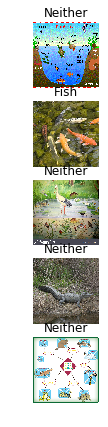

In [46]:
# TODO - your code!

# Functional approach

def scan_pond(img_paths, confidence=0.1):
    """Scans images for different types of frogs and fish"""
    # Loading ResNet w. imagenet
    model = ResNet50(weights='imagenet')
    
    fig, ax = plt.subplots(nrows=len(img_paths), figsize=(10*len(img_paths), 7))
    
    for i, img_path in enumerate(img_paths):
        frogs, fish = False, False
        # Load the image to be scanned
        img_loaded = image.load_img(img_path, target_size=(224, 224))
        # Preprocess image for prediction uniformity
        X = preprocess_input(np.expand_dims(image.img_to_array(img_loaded), axis=0))
        preds = decode_predictions(model.predict(X), top=3)[0]
        
        # Determine if there are Fish/Frogs/neither/both
        if any(['fish' in pred[1] for pred in preds]):
            fish = True
        if any(['frog' in pred[1] for pred in preds]):
            frogs = True
            
        if fish and frogs:
            ax[i].set_title('Fish & Frogs')
        elif fish:
            ax[i].set_title('Fish')
        elif frogs:
            ax[i].set_title('Frogs')
        else:
            ax[i].set_title('Neither')
        
        ax[i].imshow(img_loaded)
        ax[i].axis('off')
    
    plt.show()

scan_pond(absolute_image_paths['animal pond'])

## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [43]:
!pip install tpot

In [44]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv

--2019-04-12 17:53:29--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv.1’

kc_house_data.csv.1 100%[===================>]   2.40M  --.-KB/s    in 0.09s   

2019-04-12 17:53:29 (26.7 MB/s) - ‘kc_house_data.csv.1’ saved [2515206/2515206]



In [45]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [52]:
# TODO - your code!

# Load and peruse the data:
df = pd.read_csv('kc_house_data.csv')
df.head()
df.shape

(21613, 21)

In [0]:
# Train/Test/Split
X = df.drop(columns=['id', 'date', 'price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25)

In [55]:
TPOT = TPOTRegressor(generations=3, population_size=10, verbosity=2)
TPOT.fit(X_train, y_train)

Generation 1 - Current best internal CV score: -19401327609.87453
Generation 2 - Current best internal CV score: -19401327609.87453
Generation 3 - Current best internal CV score: -19401327609.87453

Best pipeline: ExtraTreesRegressor(KNeighborsRegressor(input_matrix, n_neighbors=46, p=1, weights=uniform), bootstrap=False, max_features=0.55, min_samples_leaf=1, min_samples_split=12, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=3,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=2,
       warm_start=False)

In [56]:
print("Score %.2f" % TPOT.score(X_test, y_test))

Score -20280628846.13


## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

Thank you for your hard work, and congratulations! You've learned a lot, and should proudly call yourself a Data Scientist.



---



*   **My strongest area is Storytelling. All the analysis or modeling in the world becomes moot if it can't be leveraged into action, after all.**  

*   **Natural Language Processing. I think there's a ridiculous premium on creating the next human-computer interfaces that will enable a higher throughput between the two. This probably unlocks untold amounts of value just like the PC, or smartphone did. Voice interfaces appear to be the next step in that evolution and the hardware pipeline seems to corroborate it.**  

*   **Basically AutoML on steroids. There's a pretty intereting trend of no-code app building systems that are on their way to ubiquity. This is effectively segregating *coding* from *programming*. You can check out Bubble.is, Glide, Squarespace, or Wix as some examples. If you think about it, that's sort of the general arc of technology: take the focused, intense technical requirements and abstract them away into simpler and simpler UX's. Pretty soon this bifurcation will extend to Data Science. People who want to achieve specific data-driven insights will be able to spoon up state-of-the art alogorithms with a handful of taps on a screen, as opposed to a few dozen lines of code.**  



---

**THANK YOU!**

